- В якості домашнього завдання вам пропонується створити рекурентну нейронну мережу за допомогою механізмів Keras, яка буде класифікувати рецензії із датасету imdb.



На відміну від прикладу в модулі 9 ми використаємо рекурентну нейронну мережу. Поекспериментуйте з будовою мережі - RNN, LSTM, двостороння та глибока.



Порівняйте результати та зробіть висновки.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, GRU, LSTM, Bidirectional, Dense

In [7]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 512
epochs = 5

In [8]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)

# word_index = imdb.get_word_index()
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in input_train[10]])
# print(decoded_review)

In [9]:
def evaluate_model(model):
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])
    print(model.summary())

    global epochs 

    history = model.fit(
        input_train,
        y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2
    )

    history_dict = history.history
    epochs = range(1, len(history_dict["accuracy"]) + 1)

    plt.plot(epochs,  history_dict["loss"], "bo", label="Training loss")
    plt.plot(epochs, history_dict["val_loss"], "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    plt.clf()
    plt.plot(epochs, history_dict["accuracy"], "bo", label="Training acc")
    plt.plot(epochs, history_dict["val_accuracy"], "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    predictions = model.predict(input_test)
    binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]
    for i in range(10):
        print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

    test_loss, test_acc = model.evaluate(input_test, y_test)
    print('Test Loss: {}'.format(test_loss))
    print('Test Accuracy: {}'.format(test_acc))

    # result = model.predict(input_test[0, :].reshape(1, maxlen))
    # print(result)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, None, 32)          320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326369 (1.24 MB)
Trainable params: 326369 (1.24 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
40/40 [==============================] - 51s 1s/step - loss: 0.6898 - accuracy: 0.5570 - val_loss: 0.6844 - val_accuracy: 0.5932
Epoch 2/5
40/40 [==============================] - 43s 1s/step - loss: 0.6603 - accuracy: 0.6309 - val_loss: 0.5996 - val_accuracy: 0.6676

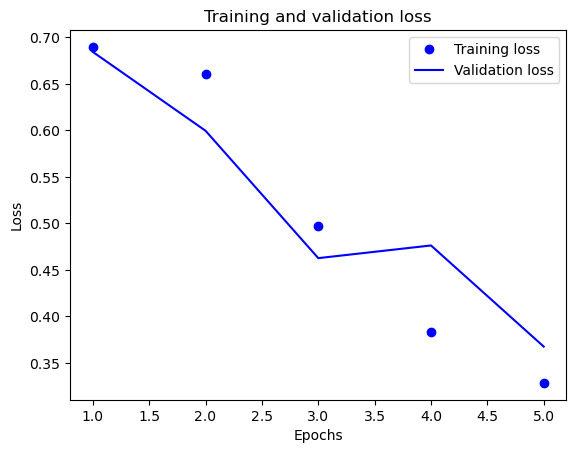

782/782 [==============================] - 26s 33ms/step
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 26s 33ms/step - loss: 0.3630 - accuracy: 0.8448
Test Loss: 0.3630073070526123
Test Accuracy: 0.8447999954223633


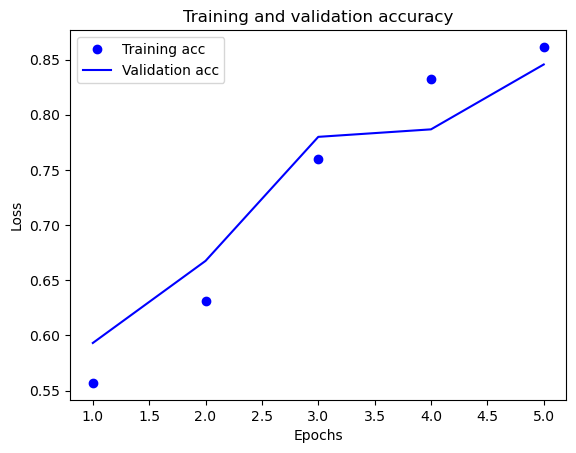

In [16]:
epochs = 5
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(GRU(32))
model.add(Dense(1, activation="sigmoid"))
evaluate_model(model)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 32)          320000    
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328353 (1.25 MB)
Trainable params: 328353 (1.25 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/5
40/40 [==============================] - 19s 428ms/step - loss: 0.6916 - accuracy: 0.5498 - val_loss: 0.6884 - val_accuracy: 0.6040
Epoch 2/5
40/40 [==============================] - 17s 433ms/step - loss: 0.6475 - accuracy: 0.6651 - val_loss: 0.5460 - val_accuracy: 

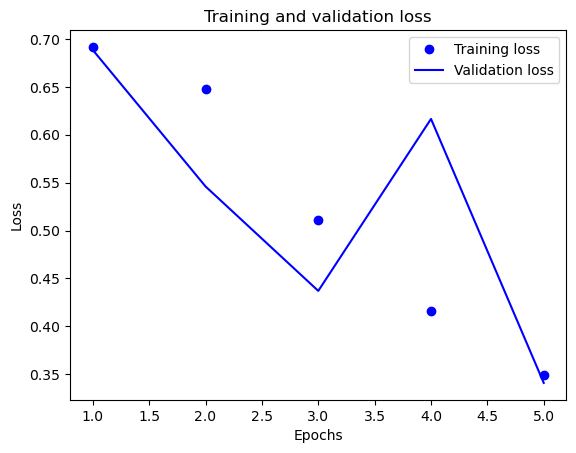

782/782 [==============================] - 29s 36ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 27s 34ms/step - loss: 0.3417 - accuracy: 0.8542
Test Loss: 0.34170714020729065
Test Accuracy: 0.854200005531311


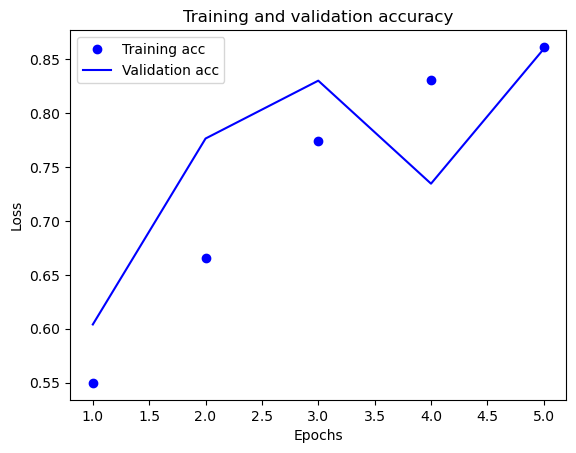

In [10]:
epochs = 5
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation="sigmoid"))
evaluate_model(model)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_3 (Bidirecti  (None, 64)                16640     
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 336705 (1.28 MB)
Trainable params: 336705 (1.28 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/4
40/40 [==============================] - 116s 3s/step - loss: 0.6931 - accuracy: 0.5058 - val_loss: 0.6928 - val_accuracy: 0.4938
Epoch 2/4
40/40 [==============================] - 113s 3s/step - loss:

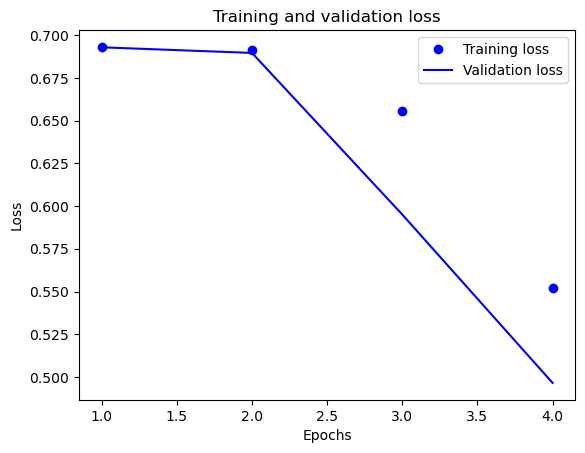

782/782 [==============================] - 34s 42ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 [==============================] - 31s 40ms/step - loss: 0.4973 - accuracy: 0.8025
Test Loss: 0.49733859300613403
Test Accuracy: 0.8025199770927429


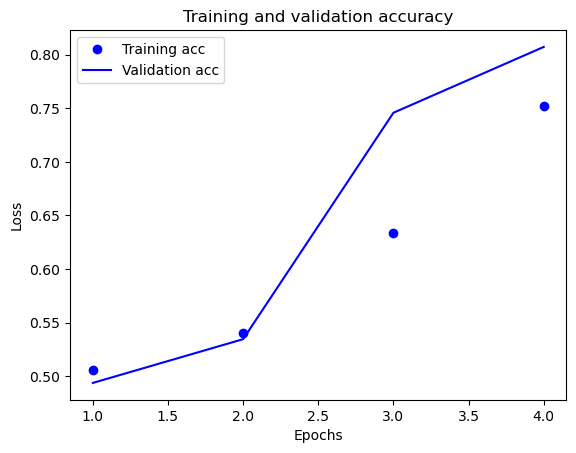

In [13]:
epochs = 4
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation="sigmoid"))
evaluate_model(model)

Додамо глибину

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 32)          320000    
                                                                 
 bidirectional_4 (Bidirecti  (None, None, 64)          16640     
 onal)                                                           
                                                                 
 bidirectional_5 (Bidirecti  (None, 64)                24832     
 onal)                                                           
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 361537 (1.38 MB)
Trainable params: 361537 (1.38 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None
Epoch 1/4
40/

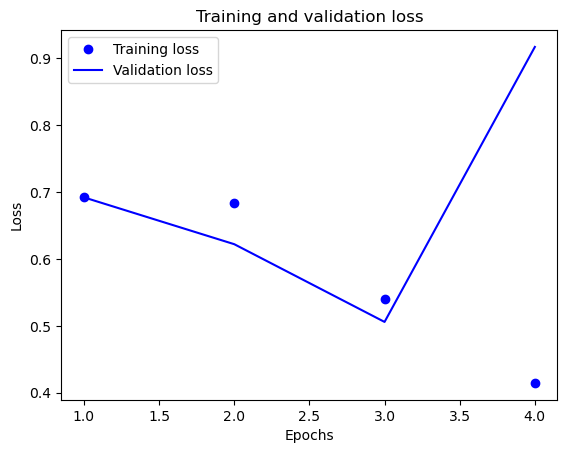

782/782 [==============================] - 63s 79ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
782/782 [==============================] - 61s 78ms/step - loss: 0.9331 - accuracy: 0.5924
Test Loss: 0.9331142902374268
Test Accuracy: 0.5923600196838379


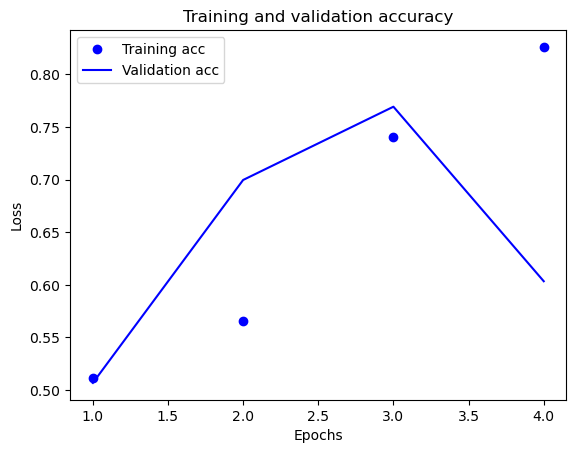

In [17]:
epochs = 4
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation="sigmoid"))
evaluate_model(model)

Ми бачимо, що додавання шарів сильно збільшує складність моделі, час розрахунку і ресурсозатратність, а точність при цьому не обов'язково росте. Бачимо, що GRU працює повільніше не дивлячись на простішу архітектуру, але вибір рекурентної мережі все одно залежатиме від датасету, і скоріше за все треба завжди пробувати різні підходи для різних ситуацій. 

В даному випадку, найефективніше себе показала звичайна LSTM(32). Іноді простіше означає краще.
